# Material Modelling

Import all modules required for the task (morse module is provided and morse.py is put in the same directory):

In [198]:
from __future__ import print_function
import numpy as np
from ase import Atoms
from ase.units import eV, Ang, GPa
import sys
sys.path.append(r'files')
import morse
%matplotlib inline
import matplotlib.pyplot as plt

## Task 1
This code models 2 copper atoms that has a distance 2.5A.

In [199]:
d = 2.5*Ang
a = Atoms('2Cu', positions=[(0., 0., 0.), (0., 0., d)])
calc = morse.MorsePotential()
a.calc = calc # note that this sets calculator to a
pe = a.get_potential_energy()
pos = a.get_positions()
pe, pos

(-0.14929402163819286,
 array([[0. , 0. , 0. ],
        [0. , 0. , 2.5]]))

We can change the positions of atoms and get the force exerted by the atoms:

In [200]:
pos[1,2] = 2.8
a.set_positions(pos)
pe = a.get_potential_energy()
f = a.get_forces()
pos, pe, f

(array([[0. , 0. , 0. ],
        [0. , 0. , 2.8]]),
 -0.1451042133708922,
 array([[ 0.        ,  0.        ,  0.14692478],
        [ 0.        ,  0.        , -0.14692478]]))

# Deliverable 1
Write a function that computes the Morse potential energy for two atoms for a given distance between them, and use it to:

1. Create a plot of the energy against distance. Now do the same for the the force exerted by one atom on the other.

2. What is the distance between the two atoms corresponding to the lowest potential energy ?

Hint: You can create an array of distances, and for each one create the Atoms object and compute the potential energy and forces. Make sure to use a sensible range of distances - if atoms are too close, the plot will be dominated by the repulsive interaction.

distance with minimum PE = 2.612613 ang


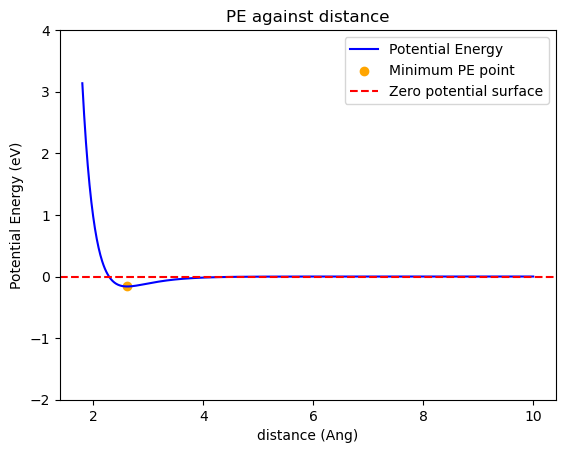

In [201]:
#create distance and pe arrays to hold data
distances = np.linspace(1.8,10,1000)
pes = np.empty_like(distances)
for i in range(len(distances)):
    d = distances[i]
    a = Atoms('2Cu',positions=[(0,0,0),(0,0,d*Ang)])
    calc = morse.MorsePotential()
    a.calc = calc # note that this sets calculator to a
    pe = a.get_potential_energy()
    pes[i] = pe
min_pe = np.min(pes)
index = np.argmin(pes)
min_distance = distances[index]
print('distance with minimum PE = %f ang'%min_distance)

plt.plot(distances, pes, color = 'blue', label='Potential Energy')
plt.scatter(min_distance, min_pe, color = 'orange', label = 'Minimum PE point')
plt.xlabel('distance (Ang)')
plt.ylabel('Potential Energy (eV)')
plt.ylim(-2,4)
plt.axhline(y=0, color='red', linestyle='--', label='Zero potential surface')
plt.title('PE against distance')
plt.legend()
plt.show()
    

# Task and Deliverable 2
1. Write a unit test that verifies that the forces returned by the get_forces() function is really the negative gradient of the energy (as returned by the get_potential_energy() function) with respect to the atomic positions. Do this by comparing the forces returned by get_forces() to those obtained by numerical finite differences of energies between two sets of atomic positions, displaced by small amount.

2. Experiment with different values of ϵ and look at how accurate the approximation is as a function of ϵ.

3. What goes wrong if you make ϵ too small?

In [202]:
#define atoms object
a = Atoms('2Cu',positions=[(0,0,0),(0,0,2*Ang)])
calc = morse.MorsePotential()
a.calc = calc 

#small displacement
dx = 0.1

# return gradient of f at x with a small displacement dx
def grad(f, x, dx):
    return (f(x+dx) - f(x))/dx




pe = a.get_potential_energy()
f = a.get_forces()
pe, f

(0.9572822919986725,
 array([[ 0.        ,  0.        , -6.46195414],
        [ 0.        ,  0.        ,  6.46195414]]))